# PREDICTING ONLINE DATING MATCHES

# **Variables:**
 1. Gender: 0 (Male), 1 (Female)
 2. PurchasedVIP: 0 (No), 1 (Yes)
 3. Income: Annual income in USD
 4. Children: Number of children
 5. Age: Age of the user
 6. Attractiveness: Subjective rating of attractiveness (1-10)
 7. Matches: Number of matches obtained based on criteria

In [1]:
# Importing all basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv(r"C:\Users\EFT\Desktop\Online_Dating_Behavior_Dataset.csv")
df.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [4]:
df.columns

Index(['Gender', 'PurchasedVIP', 'Income', 'Children', 'Age', 'Attractiveness',
       'Matches'],
      dtype='object')

In [5]:
df.shape

(1000, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          1000 non-null   int64
 1   PurchasedVIP    1000 non-null   int64
 2   Income          1000 non-null   int64
 3   Children        1000 non-null   int64
 4   Age             1000 non-null   int64
 5   Attractiveness  1000 non-null   int64
 6   Matches         1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,1000.0,0.510,0.500150,0.0,0.0,1.0,1.0,1.0
PurchasedVIP,1000.0,0.474,0.499573,0.0,0.0,0.0,1.0,1.0
Income,1000.0,50988.447,9889.336141,20786.0,44358.5,50841.5,57396.0,81931.0
Children,1000.0,0.978,0.997251,0.0,0.0,1.0,2.0,3.0
Age,1000.0,34.616,9.147799,18.0,27.0,35.0,43.0,49.0
Attractiveness,1000.0,5.624,2.824288,1.0,3.0,6.0,8.0,10.0
Matches,1000.0,76.050,52.713150,0.0,0.0,70.0,120.0,160.0


# 1. Data Cleaning

In [8]:
#Checking for null values
df.isnull().sum()

Gender            0
PurchasedVIP      0
Income            0
Children          0
Age               0
Attractiveness    0
Matches           0
dtype: int64

In [9]:
#Checking for duplicates and dropping if any
df[df.duplicated(keep=False)]
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [10]:
#checking for unique values
df.nunique()

Gender              2
PurchasedVIP        2
Income            989
Children            4
Age                32
Attractiveness     10
Matches            11
dtype: int64

# Outlier Analysis

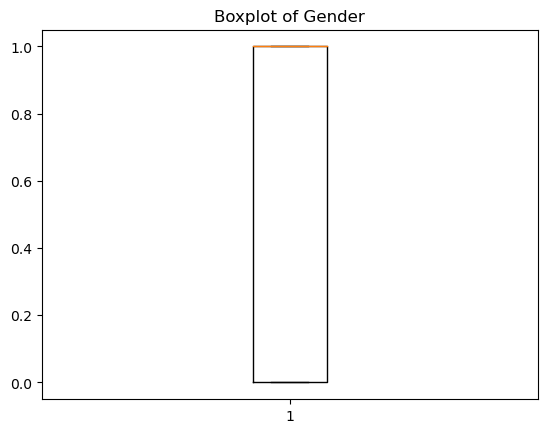

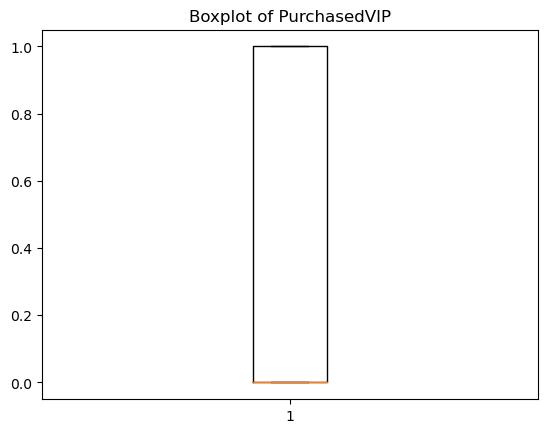

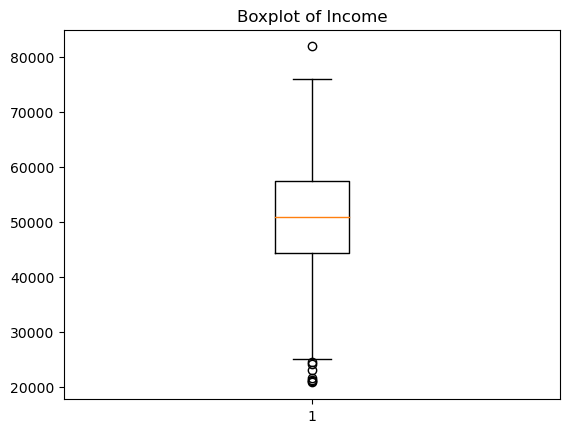

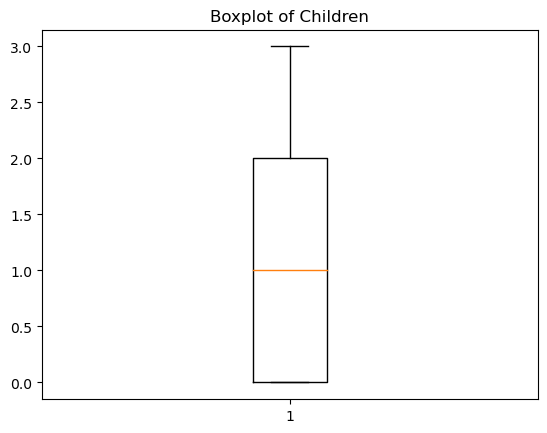

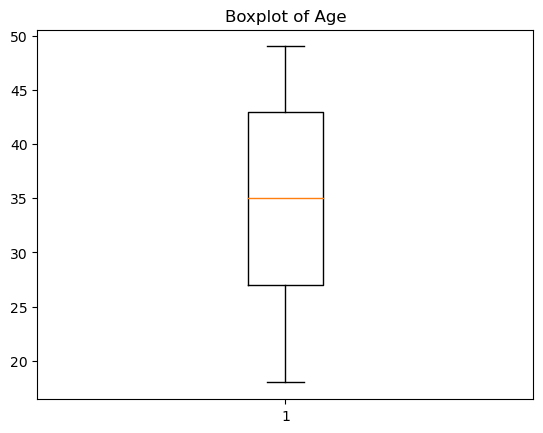

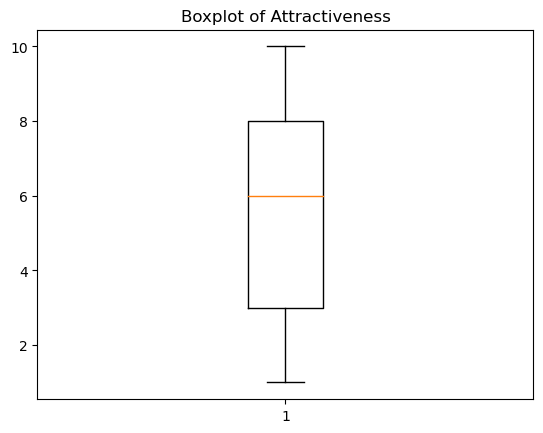

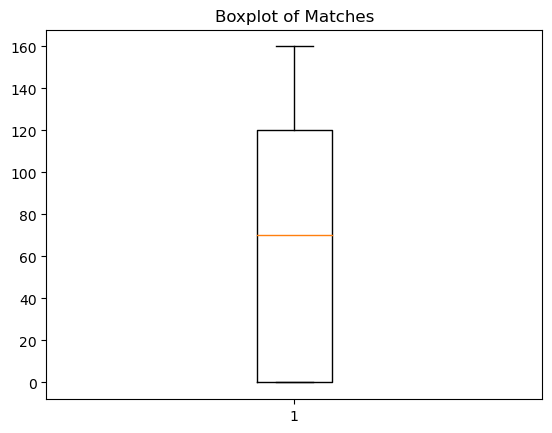

In [11]:
columns=df.select_dtypes(include=[np.number]).columns.tolist()
for column in columns:
    plt.boxplot(df[column])
    plt.title("Boxplot of "+column)
    plt.show()

In [12]:
iqr=df["Income"].quantile(0.75)-df["Income"].quantile(0.25)

In [13]:
l_limit=df["Income"].quantile(0.25)-(1.5*iqr)

In [14]:
u_limit=df["Income"].quantile(0.75)-(1.5*iqr)

In [15]:
pip install feature_engine

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


{'whiskers': [<matplotlib.lines.Line2D at 0x2993fe91d10>,
 'caps': [<matplotlib.lines.Line2D at 0x2993fe92b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2993fe911d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2993fea0750>],
 'fliers': [<matplotlib.lines.Line2D at 0x2993fea1250>],
 'means': []}

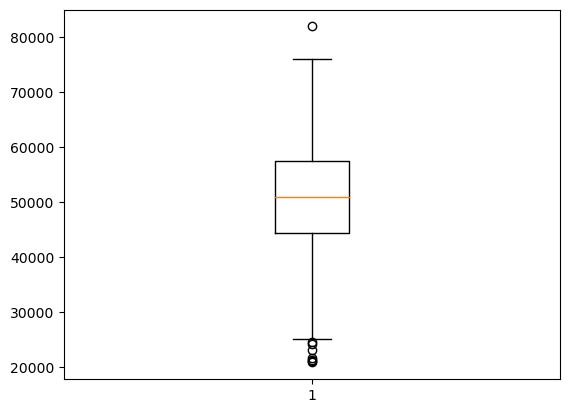

In [16]:
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='iqr',
                          tail='both',
        fold=0.05,variables=['Income'])
data= winsor.fit_transform(df[['Income']])
plt.boxplot(df.Income)

In [17]:
df

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0
...,...,...,...,...,...,...,...
995,0,0,36799,0,28,1,0
996,0,1,43882,2,46,9,70
997,1,0,49629,2,49,6,120
998,1,0,45706,1,22,8,140


In [18]:
#defining value counts, create your own dataframe and pass through the function to get the value counts
def valueCounts(df):
    for col in df.columns:
        print(df[col].value_counts())

In [19]:
df_SEM = df[["Matches"]]
valueCounts(df_SEM)

Matches
70     267
0      259
130     64
150     61
100     61
120     58
160     53
80      48
90      47
140     42
110     40
Name: count, dtype: int64


In [20]:
df[['Matches', 'Gender']].value_counts()

Matches  Gender
0        0         259
70       0         231
130      1          64
100      1          61
150      1          61
120      1          58
160      1          53
80       1          48
90       1          47
140      1          42
110      1          40
70       1          36
Name: count, dtype: int64

In [21]:
df['Gender'].value_counts(normalize=True)

Gender
1    0.51
0    0.49
Name: proportion, dtype: float64

In [22]:
df['PurchasedVIP'].value_counts(normalize=True)

PurchasedVIP
0    0.526
1    0.474
Name: proportion, dtype: float64

In [23]:
df[['Matches', 'PurchasedVIP']].value_counts()

Matches  PurchasedVIP
0        0               259
70       1               245
130      0                34
100      0                33
150      1                32
130      1                30
120      1                30
160      1                30
150      0                29
100      1                28
120      0                28
80       1                27
140      0                27
110      0                25
90       0                25
160      0                23
70       0                22
90       1                22
80       0                21
140      1                15
110      1                15
Name: count, dtype: int64

In [24]:
df['Children'].value_counts(normalize=True)

Children
0    0.412
1    0.294
2    0.198
3    0.096
Name: proportion, dtype: float64

In [25]:
df[['Matches', 'Children']].value_counts()

Matches  Children
70       0           110
0        0           105
70       1            82
0        1            80
         2            53
70       2            45
100      0            37
70       3            30
160      0            26
150      1            22
130      0            22
150      0            22
0        3            21
120      2            20
90       0            20
80       0            20
130      1            19
120      0            19
140      0            17
160      1            16
90       1            15
150      2            14
80       1            14
110      0            14
100      2            13
110      1            12
140      1            12
120      1            12
80       2            12
130      2            12
         3            11
100      1            10
140      2             8
110      2             8
90       2             8
120      3             7
110      3             6
160      3             6
140      3             5
160    

# 2. Exploratory Data Analysis

<Axes: xlabel='Matches', ylabel='count'>

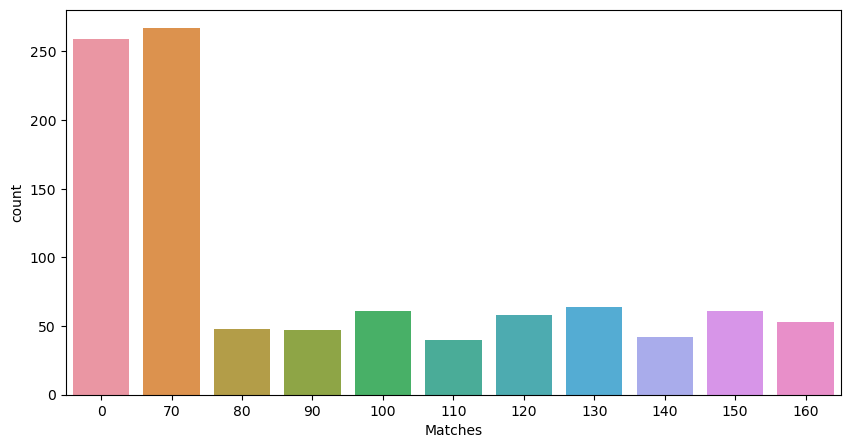

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Matches', data = df)

In [27]:
df['Matches'].value_counts(normalize=True)*100

Matches
70     26.7
0      25.9
130     6.4
150     6.1
100     6.1
120     5.8
160     5.3
80      4.8
90      4.7
140     4.2
110     4.0
Name: proportion, dtype: float64

# Numerical features

In [28]:
df['Income'].max()

81931

In [29]:
df['Income'].min()

20786

In [30]:
df['Income'].describe()

count     1000.000000
mean     50988.447000
std       9889.336141
min      20786.000000
25%      44358.500000
50%      50841.500000
75%      57396.000000
max      81931.000000
Name: Income, dtype: float64

<Axes: xlabel='Income', ylabel='Count'>

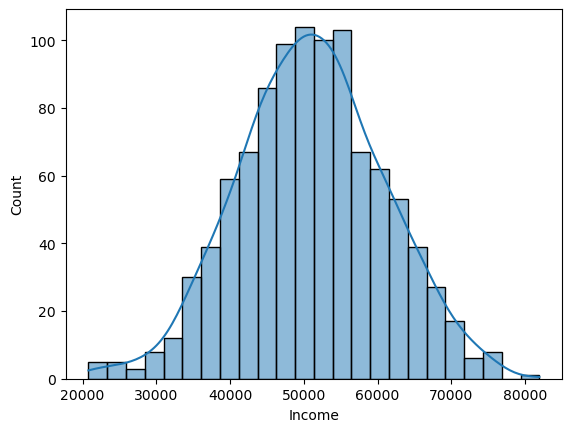

In [31]:
sns.histplot(df['Income'], kde = True)

In [32]:
df['Income'].skew()

-0.03671542148324407

<Axes: xlabel='Matches', ylabel='Income'>

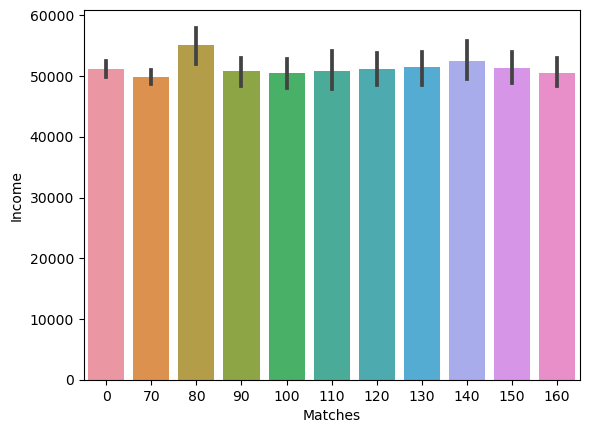

In [33]:
sns.barplot(x='Matches', y='Income', data=df)

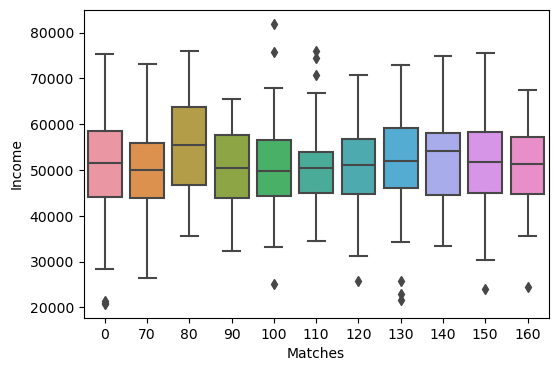

In [34]:
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="Matches", y="Income", data=df)

In [35]:
df.groupby(['Matches'])['Age'].mean()

Matches
0      34.930502
70     34.760300
80     35.291667
90     34.851064
100    34.836066
110    34.825000
120    35.793103
130    33.484375
140    34.571429
150    33.508197
160    32.509434
Name: Age, dtype: float64

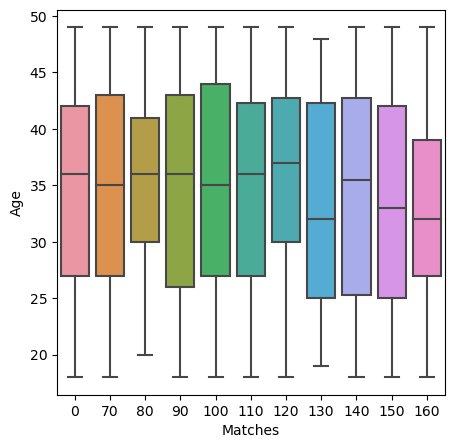

In [36]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(x="Matches", y="Age", data=df)

In [37]:
df_new = df[["Gender","PurchasedVIP","Income","Children","Age","Attractiveness"]]

In [38]:
df_new

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness
0,0,1,51777,3,47,5
1,1,0,36646,0,42,7
2,0,0,53801,1,25,5
3,0,0,56105,0,35,8
4,0,0,55597,1,36,6
...,...,...,...,...,...,...
995,0,0,36799,0,28,1
996,0,1,43882,2,46,9
997,1,0,49629,2,49,6
998,1,0,45706,1,22,8


In [90]:
df_new.min()

Gender                0
PurchasedVIP          0
Income            20786
Children              0
Age                  18
Attractiveness        1
dtype: int64

In [39]:

valueCounts(df_new)

Gender
1    510
0    490
Name: count, dtype: int64
PurchasedVIP
0    526
1    474
Name: count, dtype: int64
Income
48328    2
37903    2
58406    2
38803    2
47735    2
        ..
60506    1
61055    1
61870    1
56387    1
43075    1
Name: count, Length: 989, dtype: int64
Children
0    412
1    294
2    198
3     96
Name: count, dtype: int64
Age
25    48
49    46
48    40
40    40
37    38
34    38
47    37
39    36
43    35
30    35
44    34
29    32
20    32
32    32
33    32
28    32
42    31
46    31
35    30
23    30
41    30
45    29
38    28
27    27
31    25
36    25
22    24
21    24
19    23
24    19
18    19
26    18
Name: count, dtype: int64
Attractiveness
6     116
7     115
10    106
9     104
3     104
4     104
2      94
5      88
8      86
1      83
Name: count, dtype: int64


In [40]:
df['Matches'], df_new.value_counts()

(0       70
 1      130
 2        0
 3        0
 4        0
       ... 
 995      0
 996     70
 997    120
 998    140
 999      0
 Name: Matches, Length: 1000, dtype: int64,
 Gender  PurchasedVIP  Income  Children  Age  Attractiveness
 0       0             20786   0         25   5                 1
 1       0             55839   1         49   8                 1
                       54940   0         49   4                 1
                       55131   0         47   8                 1
                       55136   0         18   8                 1
                                                               ..
 0       1             47231   0         47   5                 1
                       47288   0         44   1                 1
                       47404   0         20   5                 1
                       47491   1         48   3                 1
 1       1             81931   0         23   4                 1
 Name: count, Length: 1000, dtype: in

<Axes: ylabel='Count'>

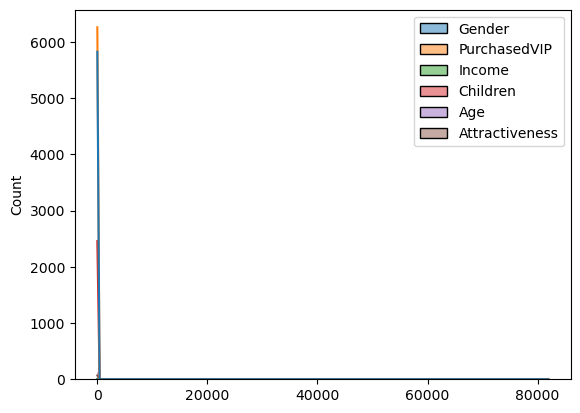

In [41]:
sns.histplot(df_new, kde= True)

<Axes: xlabel='PurchasedVIP', ylabel='Count'>

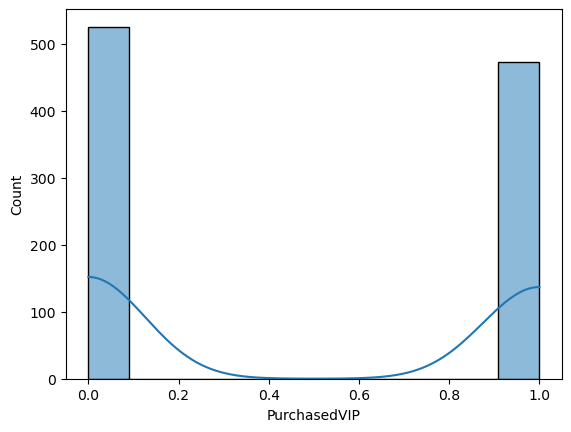

In [42]:
sns.histplot(df_new['PurchasedVIP'], kde= True)

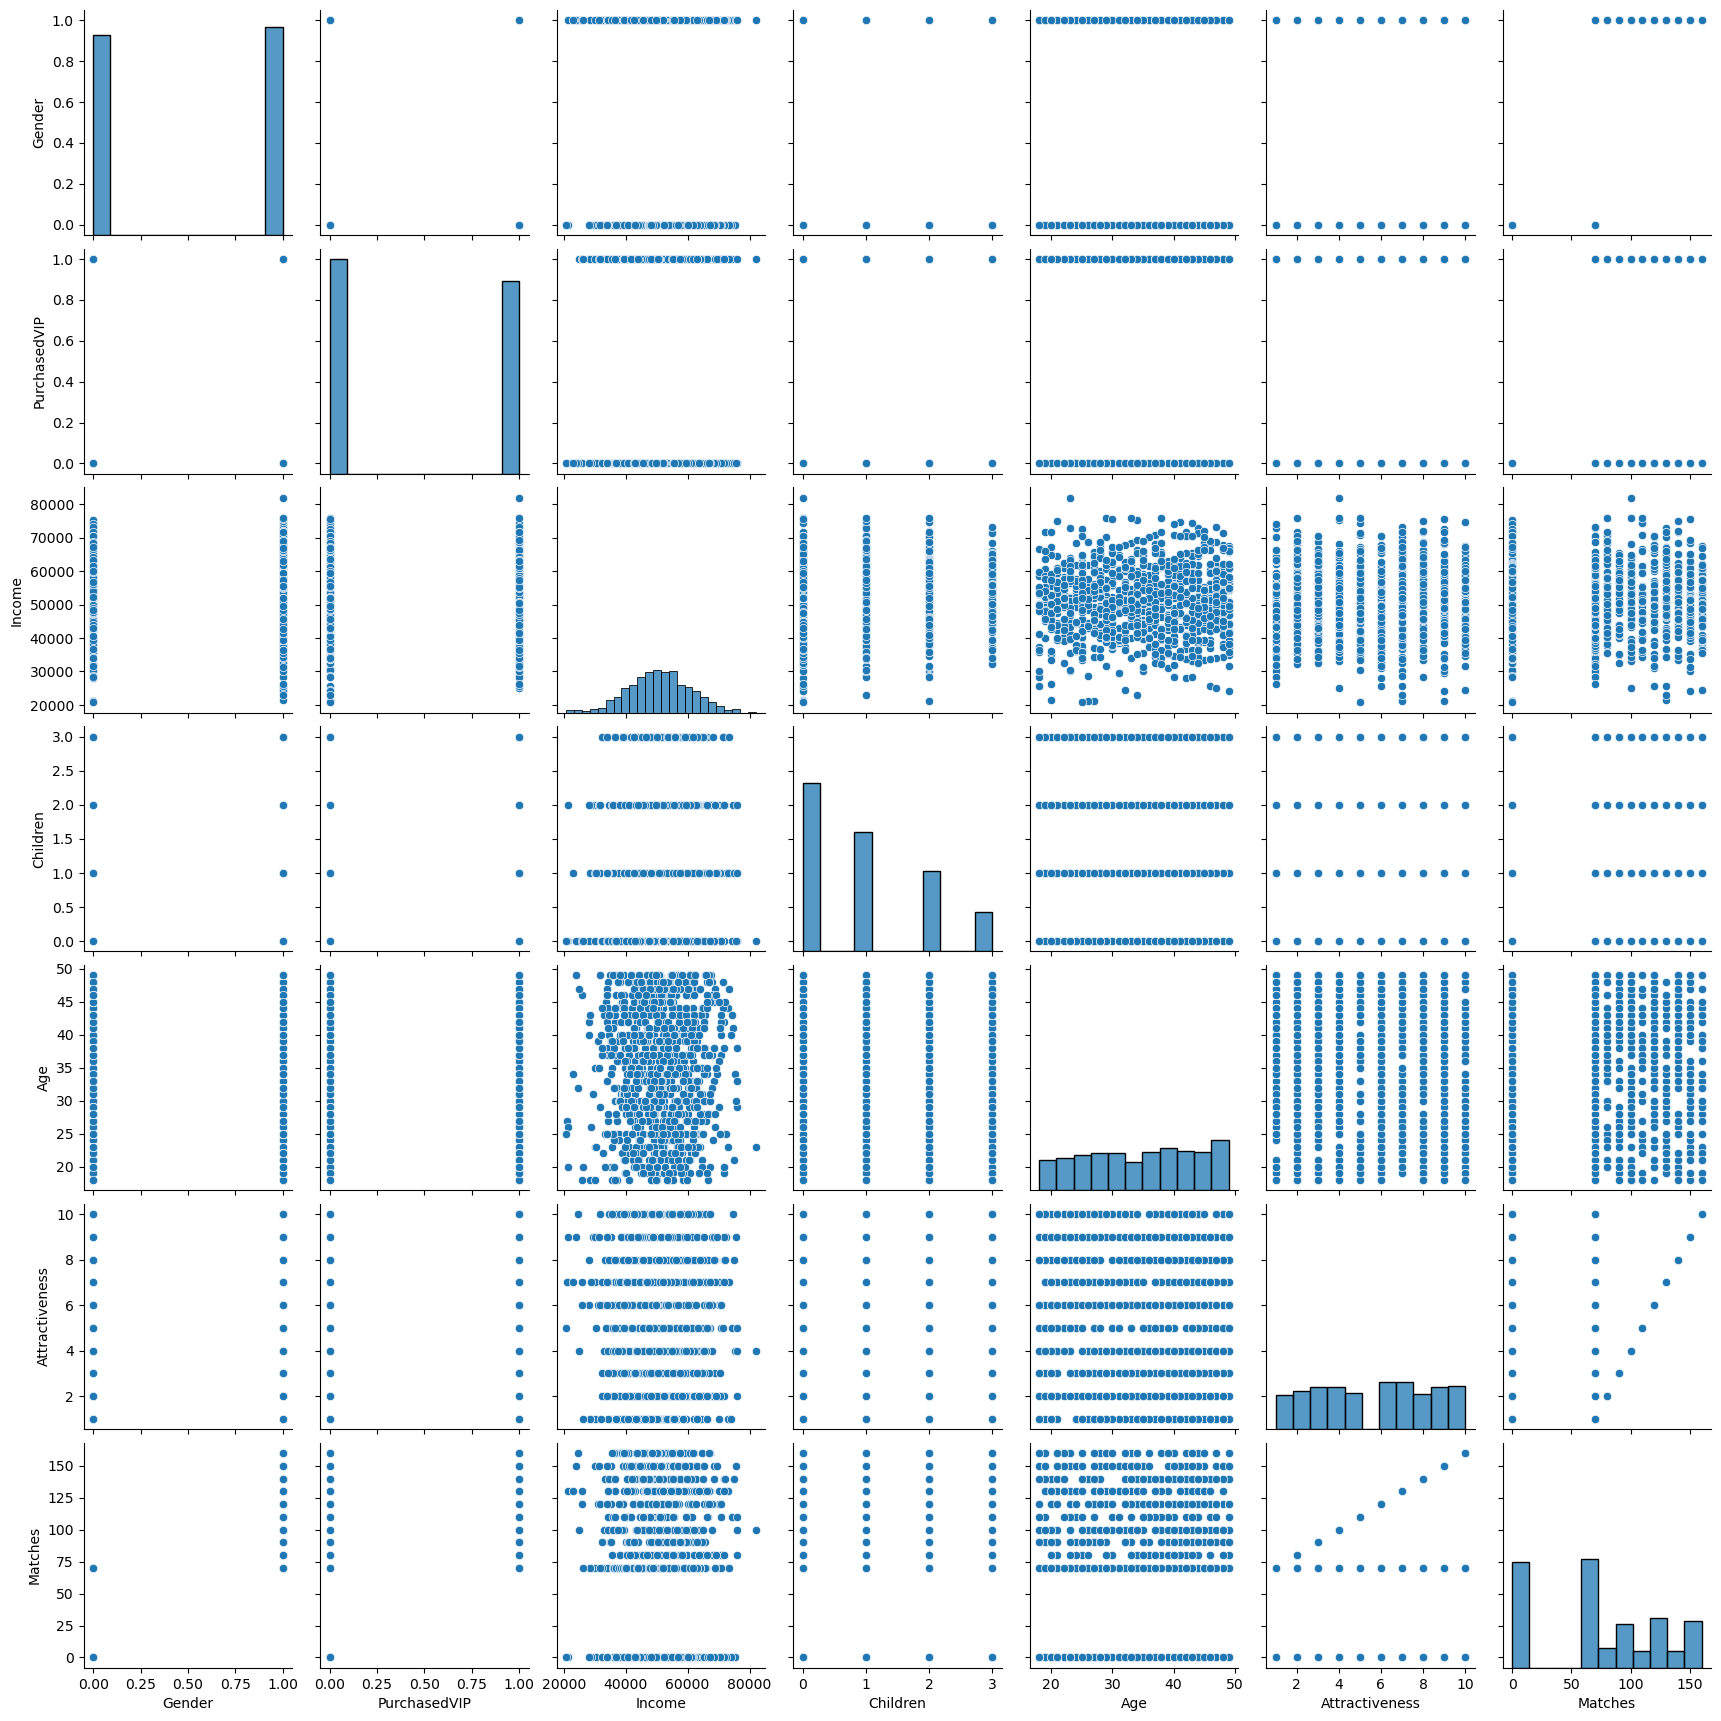

In [43]:
sns.pairplot(data = df)

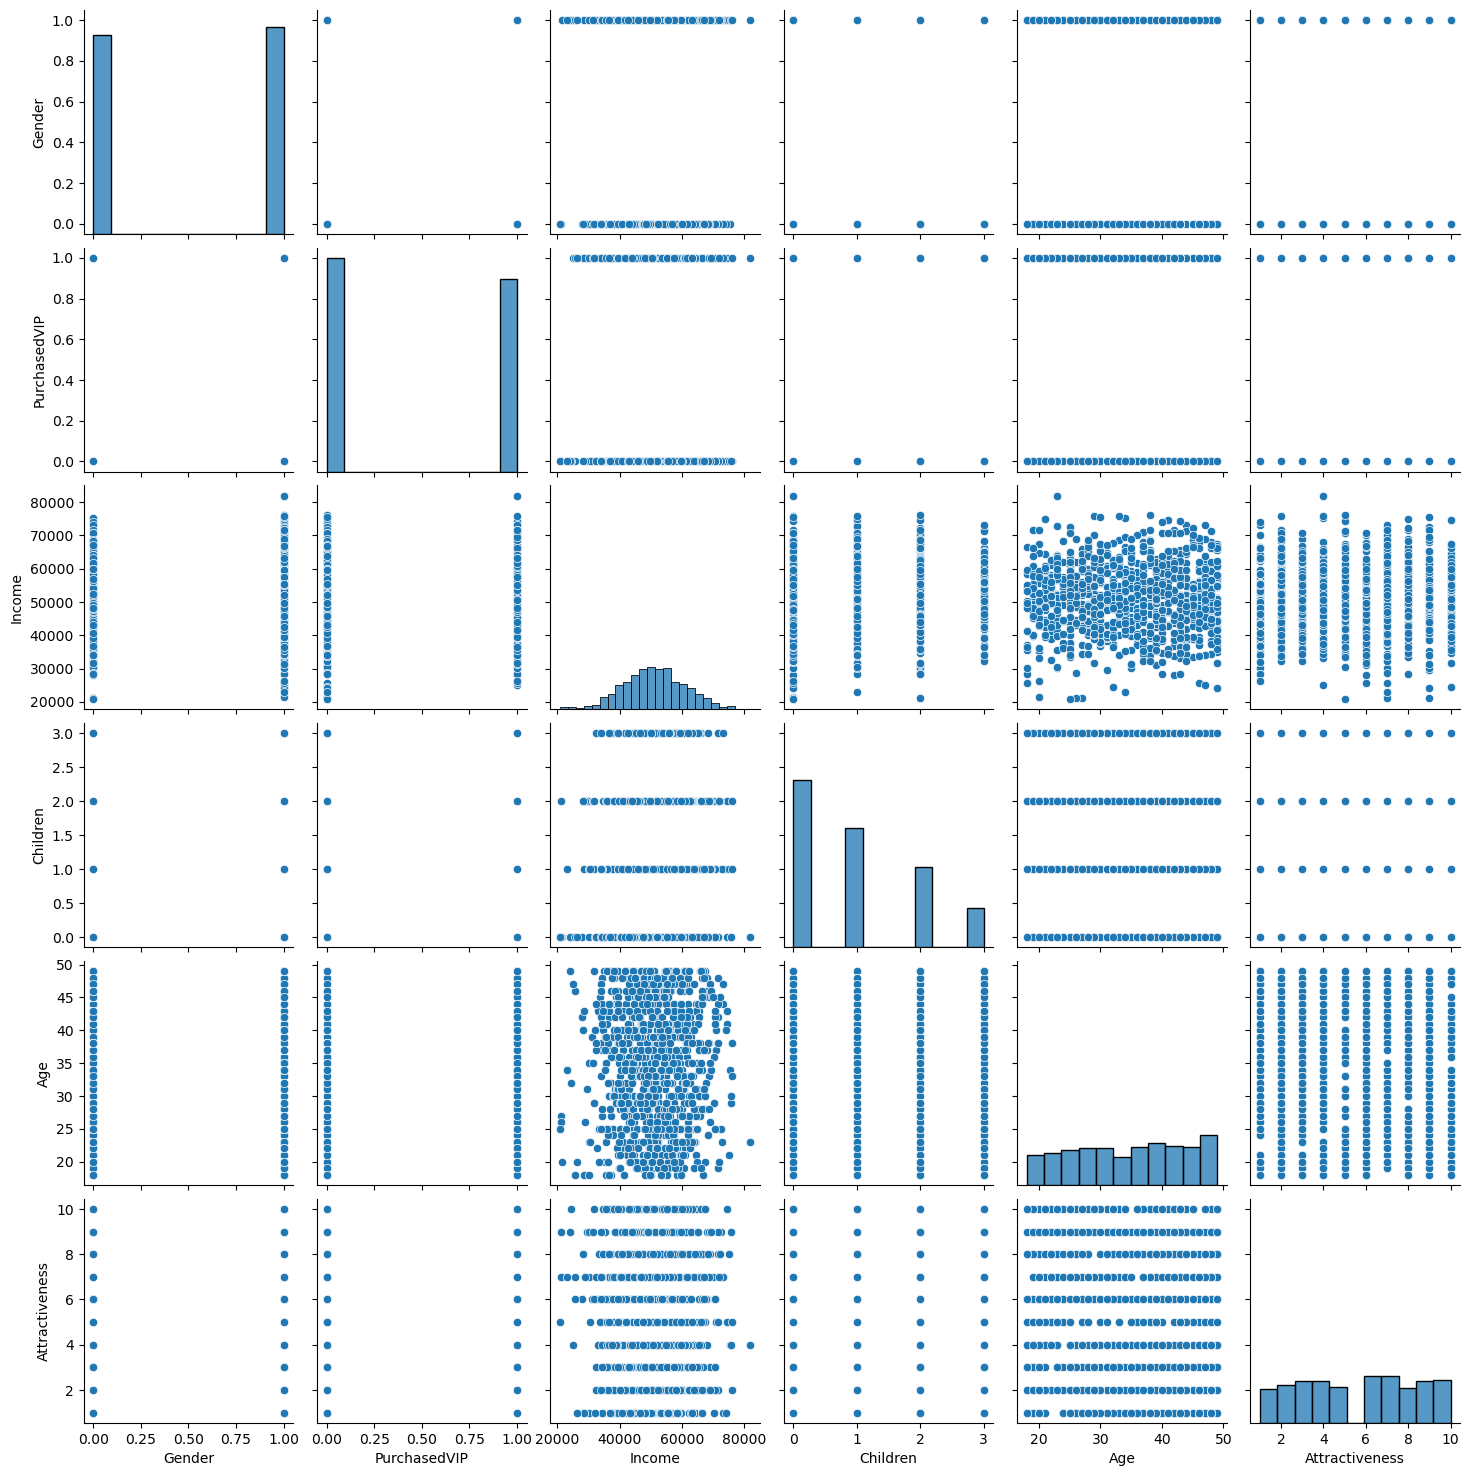

In [44]:
sns.pairplot(data = df_new)

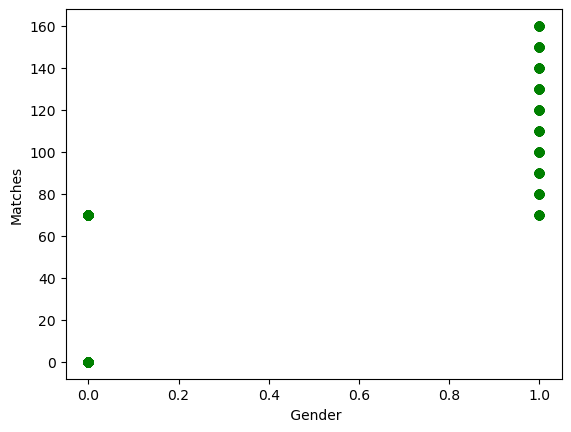

In [45]:
plt.scatter(x = df['Gender'], y = df['Matches'], color = 'green')
plt.xlabel(" Gender")
plt.ylabel("Matches")
plt.show()


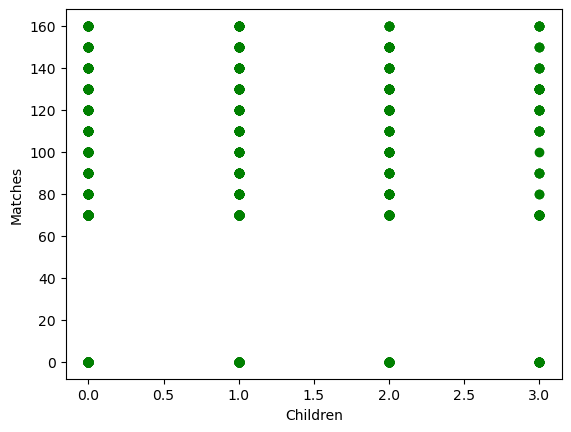

In [46]:
plt.scatter(x = df['Children'], y = df['Matches'], color = 'green')
plt.xlabel("Children")
plt.ylabel("Matches")
plt.show()

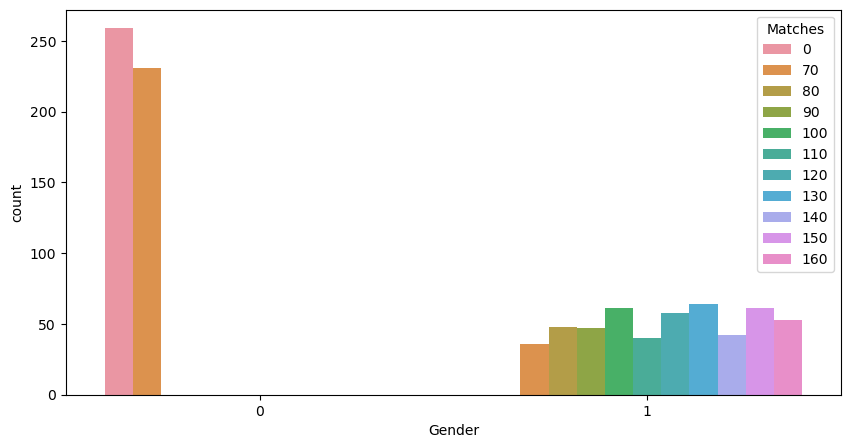

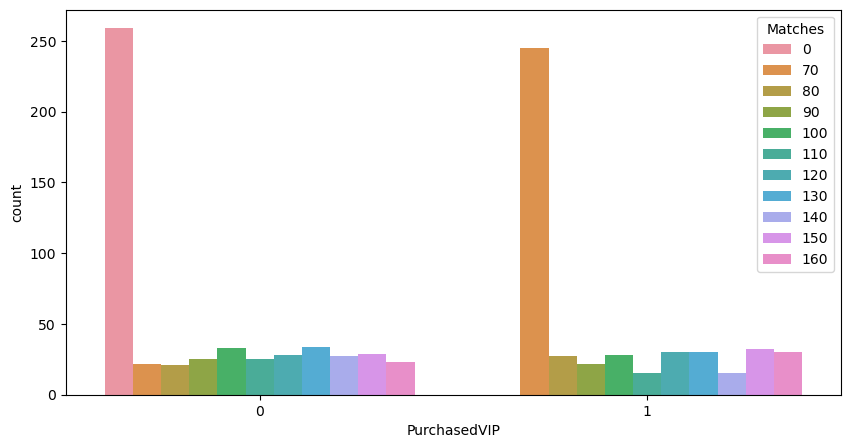

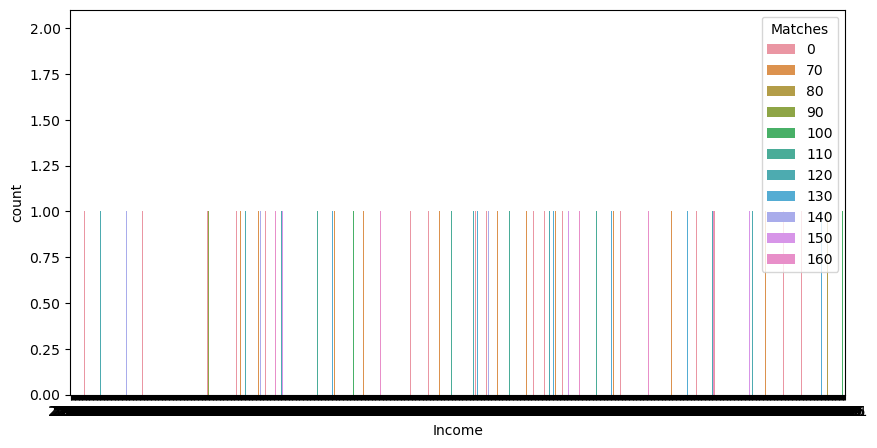

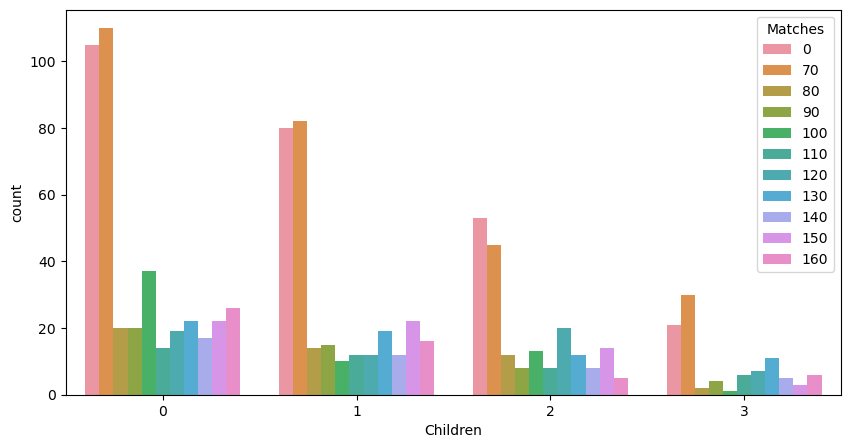

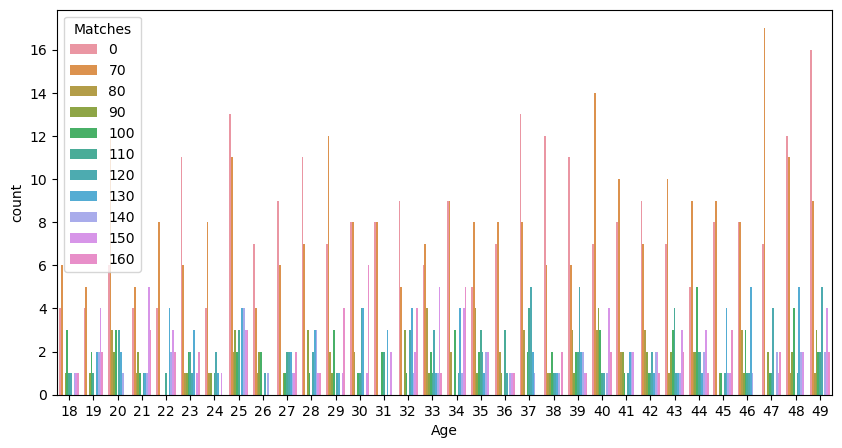

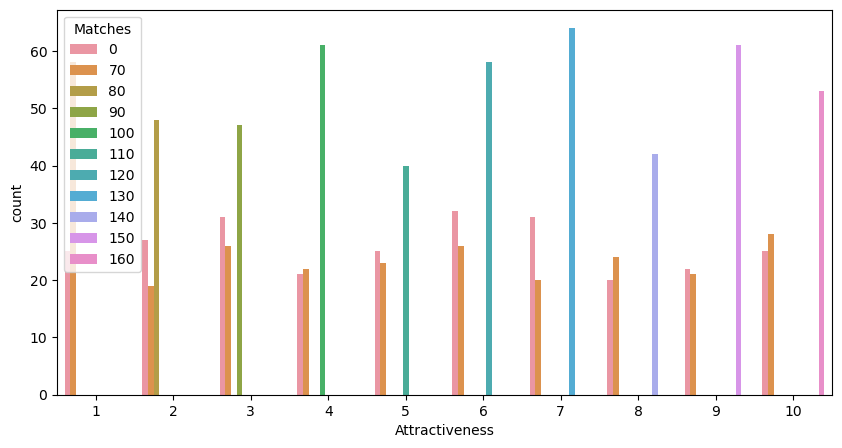

In [47]:
for col in df_new:
    plt.figure(figsize=(10,5))
    sns.countplot(x = col, hue = 'Matches', data = df)

# BUILDING THE MODEL

# LASSO AND RIDGE

In [48]:
X = df.drop(['Matches'],axis=1)
Y = df['Matches']

In [49]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [50]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(train_X,train_Y)

In [51]:
reg.score(test_X,test_Y)

0.8141425760874301

In [52]:
reg.score(train_X,train_Y)

0.8289076070171686

In [53]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(train_X,train_Y)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [54]:
lasso_reg.score(test_X,test_Y)

-0.0012904062860152887

In [55]:
lasso_reg.score(train_X,train_Y)

0.00017306887514345615

In [56]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(train_X,train_Y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [57]:
ridge_reg.score(test_X,test_Y)

0.7750574953010343

In [58]:
ridge_reg.score(train_X,train_Y)

0.7935984614319358

# NAIVE BAYES

In [59]:
# Declaring the features and the label
features = df.drop('Matches', axis=1)
label = df['Matches']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)


In [61]:
# training the model on training set

from sklearn.naive_bayes import GaussianNB


In [62]:
# Build and fit the model
clf = GaussianNB()
clf.fit(X_train, y_train)



GaussianNB()

In [63]:
# Making predictions
pred = clf.predict(X_test)

In [64]:
pred

array([ 70, 130,  90,   0, 160,   0,   0,  70,  70, 120,  70, 120, 130,
         0,   0,   0, 120,  70,  70,  70,   0,   0, 100,  70,  90,  70,
       130,  70,  70,   0,  70, 150,  70,  70,  90,   0,  70,   0,  70,
       100, 140,  90, 130, 160, 100,  80,  70,  70, 100,   0, 150, 120,
       130,  70,   0,   0,  70, 130,   0, 160, 110,   0, 120, 100,  70,
         0,  90,  70, 150, 130, 130,  80,  70,   0, 110, 160,   0, 110,
        70, 120,  70, 150, 140,   0, 130, 100,   0,   0, 160, 150,  80,
       100, 130, 160,  70, 130, 110, 150, 130,  70,  80,   0,  70,  70,
        70, 150, 130,  70, 100,   0, 120,  70,  70,  70,   0, 100, 150,
       140,  80,  70,  70,  70,   0,  70, 150, 130,   0,  70, 120,  70,
        80,  70, 160,   0, 120,  80,  70,   0,  70,   0, 100,  90, 160,
        70,   0,  70,   0, 160, 150,   0, 100, 130,  70,  70,  90,   0,
        70,  80,  70,  70, 100,  70,  80,   0, 150, 100,   0,   0,  70,
       120,  70,  90,   0, 130, 120, 160, 150, 130, 130, 160,  8

In [65]:
# Evaluate the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))
pd.crosstab(y_test,pred, rownames = ['Actual'], colnames= ['Predictions'])

0.995


Predictions,0,70,80,90,100,110,120,130,140,150,160
Actual,,,,,,,,,,,
0,43,0,0,0,0,0,0,0,0,0,0
70,0,59,1,0,0,0,0,0,0,0,0
80,0,0,9,0,0,0,0,0,0,0,0
90,0,0,0,10,0,0,0,0,0,0,0
100,0,0,0,0,14,0,0,0,0,0,0
110,0,0,0,0,0,4,0,0,0,0,0
120,0,0,0,0,0,0,11,0,0,0,0
130,0,0,0,0,0,0,0,20,0,0,0
140,0,0,0,0,0,0,0,0,3,0,0


In [66]:
from sklearn.metrics import classification_report

# Assuming y_test and pred are defined
report = classification_report(y_test, pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
          70       1.00      0.98      0.99        60
          80       0.90      1.00      0.95         9
          90       1.00      1.00      1.00        10
         100       1.00      1.00      1.00        14
         110       1.00      1.00      1.00         4
         120       1.00      1.00      1.00        11
         130       1.00      1.00      1.00        20
         140       1.00      1.00      1.00         3
         150       1.00      1.00      1.00        14
         160       1.00      1.00      1.00        12

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

